# Chapter 13: Eigendecomposition

# Concepts

In [19]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [20]:
# Finding eigenvalues

matrix_a = np.array([
    [1, 2],
    [3, 4]
])

evals = np.linalg.eigh(matrix_a)[0]
print(evals)

[-0.85410197  5.85410197]


In [21]:
# Finding eigenvectors

evecs = np.linalg.eigh(matrix_a)[1]
print(evecs)

[[-0.85065081  0.52573111]
 [ 0.52573111  0.85065081]]


In [22]:
# Diagonalizing a matrix

diag_matrix_a = np.diag(evals)
print(diag_matrix_a)

[[-0.85410197  0.        ]
 [ 0.          5.85410197]]


In [23]:
# Orthogonal Eigenvectors

# Create a symmetrical matrix
random_matrix_a = np.random.randint(-3, 4, (3, 3))
symmetrical_matrix_a = random_matrix_a.T @ random_matrix_a

# perform eigendecomposition
evals, evecs = np.linalg.eigh(symmetrical_matrix_a)

# compute all pair-wise dot products of eigenvectors matrix
dot_product_1 = np.dot(evecs[:,0], evecs[:,1])
dot_product_2 = np.dot(evecs[:,0], evecs[:,2])
dot_product_3 = np.dot(evecs[:,1], evecs[:,2])
check = np.isclose(dot_product_1, 0) and np.isclose(dot_product_2, 0) and np.isclose(dot_product_3, 0)

print("All pair-wise dot products of the eigenvectors for a symmetrical matrix are equal to zero:", check)

All pair-wise dot products of the eigenvectors for a symmetrical matrix are equal to zero: True


In [24]:
# Real-valued eigenvalues (symmetrical matrix)

matrix_a = np.array([
    [-3, -3, 0],
    [-3, -2, 1],
    [0, 1, 2]
])

evals, evecs = np.linalg.eig(matrix_a)

print(evals.reshape(-1, 1))

[[-5.59707146]
 [ 0.22606174]
 [ 2.37100972]]


In [25]:
# Eigendecomposition of singular matrices

singular_matrix_a = np.array([
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9]
])

evals, evecs = np.linalg.eig(singular_matrix_a)

print(f"Rank = {np.linalg.matrix_rank(singular_matrix_a)} \n")
print(f"Eigenvalues: {np.round(evals, 2)} \n")
print(f"Eigenvectors: {np.round(evecs, 2)} \n")

Rank = 2 

Eigenvalues: [16.12 -1.12 -0.  ] 

Eigenvectors: [[-0.46 -0.88  0.41]
 [-0.57 -0.24 -0.82]
 [-0.68  0.4   0.41]] 



In [26]:
# Generalized eigendecomposition

# create correlated matrices
random_matrix_a = np.random.randn(4, 4)
matrix_a = random_matrix_a.T @ random_matrix_a
random_matrix_b = np.random.randn(4, 4)
matrix_b = random_matrix_b.T @ random_matrix_b + matrix_a / 10

evals, evecs = scipy.linalg.eigh(matrix_a, matrix_b)
print(f"Eigenvalues: {np.round(evals, 2)} \n")
print(f"Eigenvectors: {np.round(evecs, 2)} \n")

Eigenvalues: [0.05 0.4  5.14 6.95] 

Eigenvectors: [[ 0.04 -0.17  0.87 -0.47]
 [-0.26 -0.42 -0.6   0.89]
 [ 0.4  -0.03 -0.09 -0.12]
 [ 0.07  0.    0.32  0.78]] 



# Code Exercises

In [67]:
# Exercise 13-1 (Compare eigenvectors of a matrix and its inverse)

# Create symmetric matrix
matrix_a = np.random.randn(5, 5)
symmetrical_matrix_a = matrix_a.T @ matrix_a
matrix_a_inverse = np.linalg.inv(symmetrical_matrix_a)

# Calculate eigenvalues for the symmetrical matrix and its inverse
evals = np.linalg.eig(symmetrical_matrix_a)[0]
inverse_evals = np.linalg.eig(matrix_a_inverse)[0]

check = np.allclose(np.sort(evals), np.sort(1/inverse_evals))
print("Eigenvalues of a symmetrical matrix and reciprocal of eigenvalues of that matrix inversed are the same:", check)

Eigenvalues of a symmetrical matrix and reciprocal of eigenvalues of that matrix inversed are the same: True


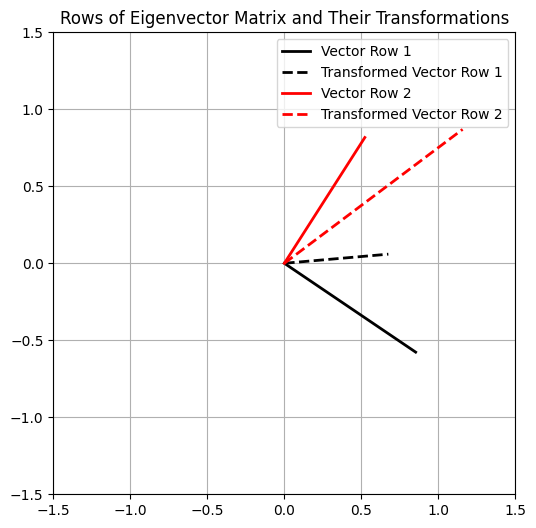

The plot demonstrates the failure of the geometric test of stretching without rotating the vectors.


In [92]:
# Define matrix
matrix_a = np.random.randn(2, 2)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix_a)

# Use rows of the eigenvector matrix
vector_row_1 = eigenvectors[0, :]
vector_row_2 = eigenvectors[1, :]

# Multiply to create new vectors
transformed_vector_row_1 = matrix_a @ vector_row_1
transformed_vector_row_2 = matrix_a @ vector_row_2

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot vectors
ax.plot([0, vector_row_1[0]], [0, vector_row_1[1]], 'k', linewidth=2, label='Vector Row 1')
ax.plot([0, transformed_vector_row_1[0]], [0, transformed_vector_row_1[1]], 'k--', linewidth=2, label='Transformed Vector Row 1')

ax.plot([0, vector_row_2[0]], [0, vector_row_2[1]], 'r', linewidth=2, label='Vector Row 2')
ax.plot([0, transformed_vector_row_2[0]], [0, transformed_vector_row_2[1]], 'r--', linewidth=2, label='Transformed Vector Row 2')

# Adjust the graph
ax.axis('square')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.grid()
ax.legend()

ax.set_title('Rows of Eigenvector Matrix and Their Transformations')

plt.show()

print("The plot demonstrates the failure of the geometric test of stretching without rotating the vectors.")


Reconstruction differences for no swapping:
[[ 0.  0.  0. -0.  0.]
 [ 0. -0.  0.  0. -0.]
 [ 0.  0. -0.  0. -0.]
 [-0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.]]
Frobenius distance: 3.7742352793868764e-15

Reconstruction differences for all eigenvalues swapped:
[[ 3.8286  1.615  -1.6435 -1.4919  1.7572]
 [ 1.615  -0.2353  1.6496 -0.3242 -1.2945]
 [-1.6435  1.6496 -5.2774 -0.3064  4.4334]
 [-1.4919 -0.3242 -0.3064  5.3556  0.4526]
 [ 1.7572 -1.2945  4.4334  0.4526 -3.6714]]
Frobenius distance: 12.445195821606383

Reconstruction differences for largest two eigenvalues swapped:
[[ 1.2295  0.7548  0.4229 -1.8752  0.4635]
 [ 0.7548 -0.9052 -1.3454 -0.4726 -1.0418]
 [ 0.4229 -1.3454 -1.7369  0.151  -1.3961]
 [-1.8752 -0.4726  0.151   2.5234 -0.0491]
 [ 0.4635 -1.0418 -1.3961 -0.0491 -1.1108]]
Frobenius distance: 5.6652772277620675

Reconstruction differences for smallest two eigenvalues swapped:
[[ 0.0106  0.0328  0.0622  0.0083 -0.1049]
 [ 0.0328 -0.3026 -0.0118 -0.0255  0.3135]
 [ 0.0622 -0

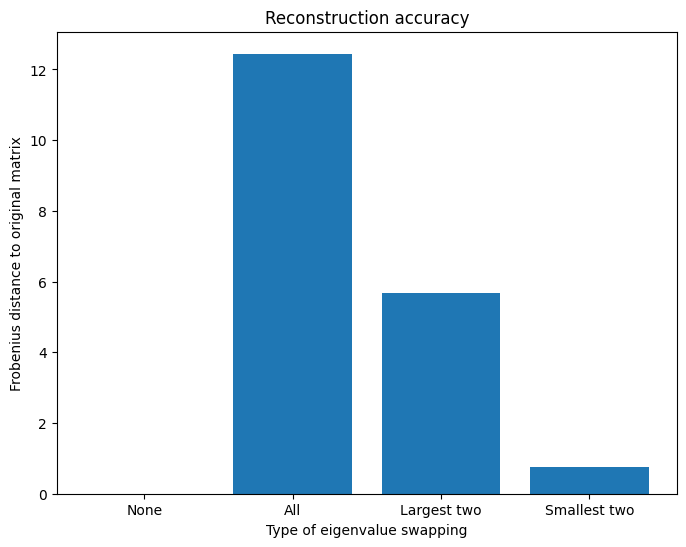

In [96]:
def create_symmetric_matrix(size):
    matrix = np.random.randn(size, size)
    return np.round(matrix.T + matrix)

def diagonalize_matrix(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors, np.diag(eigenvalues)

def reconstruct_matrix(eigenvectors, diagonal_matrix):
    return eigenvectors @ diagonal_matrix @ eigenvectors.T

def compute_reconstruction_accuracy(original_matrix, reconstructed_matrix):
    return np.sqrt(np.sum((original_matrix - reconstructed_matrix) ** 2))

def swap_eigenvalues(eigenvalues, indices):
    swapped_eigenvalues = eigenvalues[indices]
    return np.diag(swapped_eigenvalues)

def plot_accuracies(accuracies, labels):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(accuracies)), accuracies)
    plt.xticks(range(len(accuracies)), labels)
    plt.ylabel('Frobenius distance to original matrix')
    plt.xlabel('Type of eigenvalue swapping')
    plt.title('Reconstruction accuracy')
    plt.show()


matrix_size = 5
reconstruction_accuracies = np.zeros(4)

symmetric_matrix = create_symmetric_matrix(matrix_size)

eigenvalues, eigenvectors, diagonal_matrix = diagonalize_matrix(symmetric_matrix)

# No swapping
reconstructed_matrix = reconstruct_matrix(eigenvectors, diagonal_matrix)
reconstruction_accuracies[0] = compute_reconstruction_accuracy(symmetric_matrix, reconstructed_matrix)
print(f'\nReconstruction differences for no swapping:\n{np.round(symmetric_matrix - reconstructed_matrix, 4)}')
print(f'Frobenius distance: {reconstruction_accuracies[0]}')

# All eigenvalues swapped
permuted_diagonal_matrix = swap_eigenvalues(eigenvalues, np.random.permutation(matrix_size))
reconstructed_matrix = reconstruct_matrix(eigenvectors, permuted_diagonal_matrix)
reconstruction_accuracies[1] = compute_reconstruction_accuracy(symmetric_matrix, reconstructed_matrix)
print(f'\nReconstruction differences for all eigenvalues swapped:\n{np.round(symmetric_matrix - reconstructed_matrix, 4)}')
print(f'Frobenius distance: {reconstruction_accuracies[1]}')

# Swap largest two eigenvalues
sorted_indices = np.argsort(eigenvalues)
swapped_indices_largest = sorted_indices[np.r_[np.arange(matrix_size-2), matrix_size-1, matrix_size-2]][::-1]
swapped_diagonal_matrix_largest = swap_eigenvalues(eigenvalues, swapped_indices_largest)
reconstructed_matrix = reconstruct_matrix(eigenvectors, swapped_diagonal_matrix_largest)
reconstruction_accuracies[2] = compute_reconstruction_accuracy(symmetric_matrix, reconstructed_matrix)
print(f'\nReconstruction differences for largest two eigenvalues swapped:\n{np.round(symmetric_matrix - reconstructed_matrix, 4)}')
print(f'Frobenius distance: {reconstruction_accuracies[2]}')

# Swap smallest two eigenvalues
swapped_indices_smallest = sorted_indices[np.r_[1, 0, np.arange(2, matrix_size)]][::-1]
swapped_diagonal_matrix_smallest = swap_eigenvalues(eigenvalues, swapped_indices_smallest)
reconstructed_matrix = reconstruct_matrix(eigenvectors, swapped_diagonal_matrix_smallest)
reconstruction_accuracies[3] = compute_reconstruction_accuracy(symmetric_matrix, reconstructed_matrix)
print(f'\nReconstruction differences for smallest two eigenvalues swapped:\n{np.round(symmetric_matrix - reconstructed_matrix, 4)}')
print(f'Frobenius distance: {reconstruction_accuracies[3]}')

# Plot the results
labels = ['None', 'All', 'Largest two', 'Smallest two']
plot_accuracies(reconstruction_accuracies, labels)

In [30]:
# Exercise 13-4 (Show that the eigenvalues of a random matrix are distributed in a circle with the radius proportional to the matrix size)

In [31]:
# Exercise 13-5 (Eigenvector is the basis for the null-space of the eigenvalue-shifted matrix)

In [32]:
# Exercise 13-6 (Alternative method of creating random symmetrical matrices)

In [33]:
# Exercise 13-7 (Shrinkage regularization)

In [34]:
# Exercise 13-8 (Create surrogate data with specified correlation matrix)

In [35]:
# Exercise 13-9 (Remove imposed correlations by whitening)

In [36]:
# Exercise 13-10 (Confirm eigenvectors are not orthogonal when using generalized eigendecomposition)

In [37]:
# Exercise 13-11 (Scaling of eigenvectors)